In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Random effects model

$y_{i,t} = \alpha_i + \beta_i x_{t-1,i} + \gamma_i w_{t-1} + \epsilon_{t,i}$

$\alpha_i = \alpha_0 + \eta_{\alpha_i}$

$\beta_i = \beta_0 + \eta_{\beta_i}$

$\gamma_i = \gamma_0 + \eta_{\gamma_i}$

$\alpha_0 \sim \mathcal{N}(0, \tau_\alpha)$

$\beta_0 \sim \mathcal{N}(0, \tau_\beta)$

$\gamma_0 \sim \mathcal{N}(0, \tau_\gamma)$

$\eta_{\alpha_i} \sim \mathcal{N}(0, \tau_{\eta_\alpha})$

$\eta_{\beta_i} \sim \mathcal{N}(0, \tau_{\eta_\beta})$

$\eta_{\gamma_i} \sim \mathcal{N}(0, \tau_{\eta_\gamma})$

$\tau_\alpha, \tau_\beta, \tau_\gamma, \tau_{\eta_\alpha}, \tau_{\eta_\beta}, \tau_{\eta_\gamma} \sim \Gamma(1,1)$

In [30]:
import pandas as pd
from seminartools.data import read_inflation, read_merged

In [31]:
df = read_merged()
df

,,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
country,date,,,,,,,,,
Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...
Switzerland,2023-01-01,0.010084,0.309543,1.166667,4.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [32]:
from seminartools.models.random_effects_model import RandomEffectsModel

model = RandomEffectsModel()
model

GPU!!!


In [33]:
df

,,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
country,date,,,,,,,,,
Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...
Switzerland,2023-01-01,0.010084,0.309543,1.166667,4.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [34]:
model.fit(df)

Compiling...


Compilation time = 0:00:00.659647
Sampling...
Sampling time = 0:00:16.590004
Transforming variables...
Transformation time = 0:00:00.285020


/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/arviz/stats/density_utils.py:699: RuntimeWarning: divide by zero encountered in divide
  f = grid_counts / bin_width / len(x)
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/arviz/stats/density_utils.py:699: RuntimeWarning: invalid value encountered in divide
  f = grid_counts / bin_width / len(x)
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/arviz/stats/density_utils.py:702: RuntimeWarning: divide by zero encountered in scalar divide
  bw /= bin_width


OverflowError: cannot convert float infinity to integer

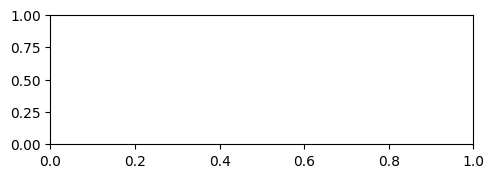

In [36]:
import arviz as az
#model.results.posterior
az.plot_trace(model.results.posterior)

In [37]:
az.summary(model.results.posterior)

arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-4.957,0.0,-4.957,-4.957,0.0,0.0,5004.0,5004.0,NaN
gdp_growth,-0.282,0.0,-0.282,-0.282,0.0,0.0,5000.0,5000.0,NaN
interest_rate,-0.986,0.0,-0.986,-0.986,0.0,0.0,5000.0,5000.0,NaN
unemployment_rate,0.096,0.0,0.096,0.096,0.0,0.0,5000.0,5000.0,NaN
commodity_CRUDE_PETRO,-0.431,0.0,-0.431,-0.431,0.0,0.0,5000.0,5000.0,NaN
commodity_iNATGAS,-0.896,0.0,-0.896,-0.896,0.0,0.0,5000.0,5000.0,NaN
commodity_iAGRICULTURE,0.615,0.0,0.615,0.615,0.0,0.0,5000.0,5000.0,NaN
commodity_iMETMIN,-0.447,0.0,-0.447,-0.447,0.0,0.0,5000.0,5000.0,NaN
commodity_iPRECIOUSMET,-0.224,0.0,-0.224,-0.224,0.0,0.0,5000.0,5000.0,NaN
gdp_growth_lag_1,0.449,0.0,0.449,0.449,0.0,0.0,5000.0,5000.0,NaN


In [53]:
import seaborn as sns
preds = model.predict(df)

sns.lineplot(data = preds, x= "date", hue = "country", y = "inflation")

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.